# Python_preprocessing_outliers_handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
data=pd.read_csv("data_sets/data1/cleansed.csv")

In [67]:
#data.drop('Unnamed: 0',axis=1, inplace=True)

In [68]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4859,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4860,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4861,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [24]:
num_columns=[var for var in data.columns if data[var].dtypes!='O']

In [25]:
num_columns

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [26]:
cat_columns=[var for var in data.columns if data[var].dtypes=='O']

In [28]:
cat_columns

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

# BoxPlot

<AxesSubplot:xlabel='MonthlyIncome'>

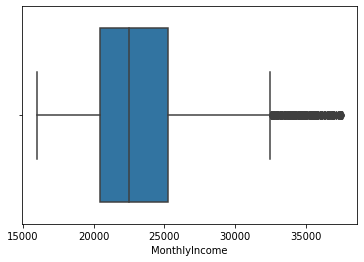

In [93]:
sns.boxplot(data=data,x="MonthlyIncome")

<AxesSubplot:xlabel='NumberOfTrips'>

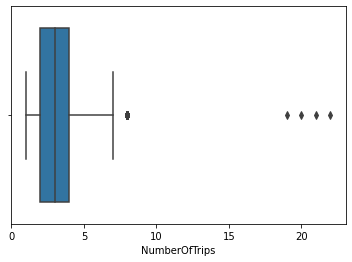

In [94]:
sns.boxplot(data=data,x="NumberOfTrips")

# IQR

In [95]:
def get_iqr(var):
    q1=data[var].quantile(0.20)
    q3=data[var].quantile(0.80)
    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+(1.5*IQR)
    return lower_limit,upper_limit

In [96]:
get_iqr("NumberOfTrips")

(-2.5, 9.5)

In [102]:
def return_after_removing_outliers(var):
    lower_limit,upper_limit=get_iqr(var)
    data.loc[(data[var]<lower_limit) | (data[var]>upper_limit)]
    data[var]=np.where(data[var]<lower_limit,lower_limit,data[var])
    data[var]=np.where(data[var]>upper_limit,upper_limit,data[var])

In [103]:
return_after_removing_outliers("NumberOfTrips")

In [85]:
data.loc[(data['MonthlyIncome']<lower_limit) | (data['MonthlyIncome']>upper_limit)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2444,202469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,2.0,0,5,0,2.0,VP,37772.0
2448,202473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,2.0,0,2,0,2.0,VP,37625.0
2457,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,204812,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,3.0,Married,5.0,0,5,1,1.0,VP,38418.0
4807,204832,1,52.0,Company Invited,1,35.0,Salaried,Male,4,5.0,Deluxe,3.0,Single,5.0,0,3,0,1.0,Manager,38525.0
4811,204836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,2.0,0,1,1,3.0,Executive,37868.0
4844,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,2.0,0,1,1,2.0,Executive,37865.0


In [89]:
data.drop(index=data.loc[(data['MonthlyIncome']<lower_limit) | (data['MonthlyIncome']>upper_limit)].index,inplace=True)

In [104]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4859,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4860,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4861,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


<AxesSubplot:xlabel='NumberOfTrips'>

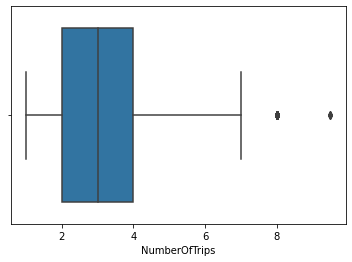

In [106]:
sns.boxplot(data=data,x="NumberOfTrips")

# Z-Score

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='MonthlyIncome'>

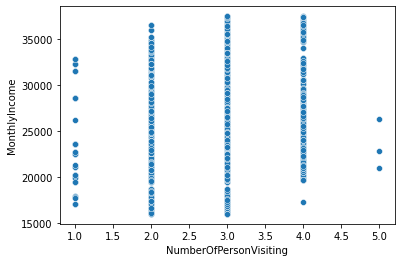

In [115]:
sns.scatterplot(y="MonthlyIncome",x="NumberOfPersonVisiting", data=data)

<AxesSubplot:ylabel='NumberOfPersonVisiting'>

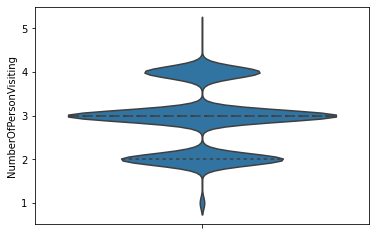

In [119]:
sns.violinplot(y="NumberOfPersonVisiting", data=data,inner="quartile")

<AxesSubplot:ylabel='NumberOfPersonVisiting'>

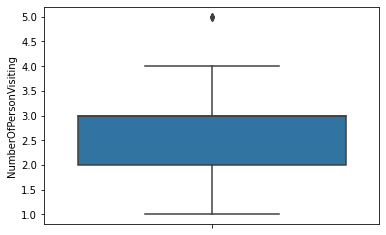

In [136]:
sns.boxplot(data=data,y='NumberOfPersonVisiting')

In [124]:
from scipy import stats as st

In [135]:
data[(st.zscore(data['NumberOfPersonVisiting'])>2.5)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3952,203977,0,60.0,Self Enquiry,3,32.0,Salaried,Fe Male,5,4.0,Standard,5.0,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0
3977,204002,0,31.0,Self Enquiry,1,9.0,Salaried,Male,5,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,22830.0
4080,204105,0,28.0,Self Enquiry,1,16.0,Small Business,Female,5,4.0,Basic,4.0,Single,3.0,0,3,0,2.0,Executive,20957.0
